In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('pre-ownedcars.csv')
df

,brand,model,transmission,make_year,reg_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance,spare_key,reg_number,title
0,Mahindra,Thar LX D 4WD MT CONVERTIBLE,Manual,2020.0,01-01-2021,Diesel,2184.0,11003.0,1st owner,1231000,23431.0,True,No,HR26,2020 Mahindra Thar LX D 4WD MT CONVERTIBLE
1,Hyundai,Verna 1.6 VTVT SX,Manual,2018.0,01-07-2018,Petrol,1591.0,66936.0,1st owner,786000,15359.0,True,No,DL7C,2018 Hyundai Verna 1.6 VTVT SX
2,Tata,Harrier XT PLUS 2.0L KRYOTEC DARK EDITON,Manual,2022.0,01-08-2022,Diesel,1956.0,27990.0,1st owner,1489000,28349.0,True,No,HR29,2022 Tata Harrier XT PLUS 2.0L KRYOTEC DARK ED...
3,Honda,City 1.5L I-VTE V CVT,Automatic,2023.0,01-04-2023,Petrol,1498.0,5061.0,1st owner,1227000,23355.0,True,Yes,DL4C,2023 Honda City 1.5L I-VTE V CVT
4,Ford,Ecosport TITANIUM 1.5L DIESEL,Manual,2021.0,01-07-2021,Diesel,1498.0,23480.0,1st owner,887000,16883.0,True,No,UP14,2021 Ford Ecosport TITANIUM 1.5L DIESEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,Ford,Ecosport TREND + 1.5L PETROL AT,Automatic,2018.0,NaN,Petrol,1497.0,46982.0,1st owner,661000,12920.0,True,Yes,MH03,2018 Ford Ecosport TREND + 1.5L PETROL AT
2802,Honda,Jazz 1.2L I-VTEC V,Manual,2015.0,NaN,Petrol,1199.0,38706.0,2nd owner,412000,8057.0,True,Yes,MH01,2015 Honda Jazz 1.2L I-VTEC V
2803,Hyundai,Elite i20 MAGNA 1.2,Manual,2016.0,NaN,Petrol,1197.0,31405.0,1st owner,496000,9704.0,True,Yes,MH03,2016 Hyundai Elite i20 MAGNA 1.2
2804,Maruti,Baleno DELTA PETROL 1.2,Manual,2017.0,NaN,Petrol,1197.0,47676.0,1st owner,509000,9959.0,True,Yes,MH04,2017 Maruti Baleno DELTA PETROL 1.2


In [52]:
print(df.duplicated().sum())

1


In [53]:
print(len(df['reg_number'].unique()))

158


In [54]:
df=df.drop_duplicates()
df.shape

(2805, 15)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2805 entries, 0 to 2805
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                2804 non-null   object 
 1   model                2804 non-null   object 
 2   transmission         2804 non-null   object 
 3   make_year            2804 non-null   float64
 4   reg_year             720 non-null    object 
 5   fuel_type            2804 non-null   object 
 6   engine_capacity(CC)  2687 non-null   float64
 7   km_driven            2804 non-null   float64
 8   ownership            2804 non-null   object 
 9   price                2805 non-null   int64  
 10  overall_cost         2804 non-null   float64
 11  has_insurance        2804 non-null   object 
 12  spare_key            2804 non-null   object 
 13  reg_number           2804 non-null   object 
 14  title                2804 non-null   object 
dtypes: float64(4), int64(1), object(10)
memory 

In [56]:
print(df.isnull().sum())

brand                     1
model                     1
transmission              1
make_year                 1
reg_year               2085
fuel_type                 1
engine_capacity(CC)     118
km_driven                 1
ownership                 1
price                     0
overall_cost              1
has_insurance             1
spare_key                 1
reg_number                1
title                     1
dtype: int64


In [57]:
df=df.drop(columns=['reg_year'])
df=df.drop(columns=['title'])
df=df.drop(columns=['reg_number'])

In [58]:
print(len(df['model'].unique()))

819


In [59]:
df=df.drop(columns=['model'])

In [60]:
df = df.drop(df.index[-1])

In [61]:
print('PRICE = 0 : ', df[df['price'] == 0].shape)

PRICE = 0 :  (0, 11)


In [62]:
df['engine_capacity(CC)']=df['engine_capacity(CC)'].fillna(df['engine_capacity(CC)'].mean())

In [63]:
print(df.isnull().sum())

brand                  0
transmission           0
make_year              0
fuel_type              0
engine_capacity(CC)    0
km_driven              0
ownership              0
price                  0
overall_cost           0
has_insurance          0
spare_key              0
dtype: int64


In [64]:
df['make_year'] = df['make_year'].astype('int64')
df['engine_capacity(CC)'] = df['engine_capacity(CC)'].astype('int64')
df['km_driven'] = df['km_driven'].astype('int64')
df['overall_cost'] = df['overall_cost'].astype('int64')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2804 entries, 0 to 2804
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   brand                2804 non-null   object
 1   transmission         2804 non-null   object
 2   make_year            2804 non-null   int64 
 3   fuel_type            2804 non-null   object
 4   engine_capacity(CC)  2804 non-null   int64 
 5   km_driven            2804 non-null   int64 
 6   ownership            2804 non-null   object
 7   price                2804 non-null   int64 
 8   overall_cost         2804 non-null   int64 
 9   has_insurance        2804 non-null   object
 10  spare_key            2804 non-null   object
dtypes: int64(5), object(6)
memory usage: 262.9+ KB


In [66]:
df.shape

(2804, 11)

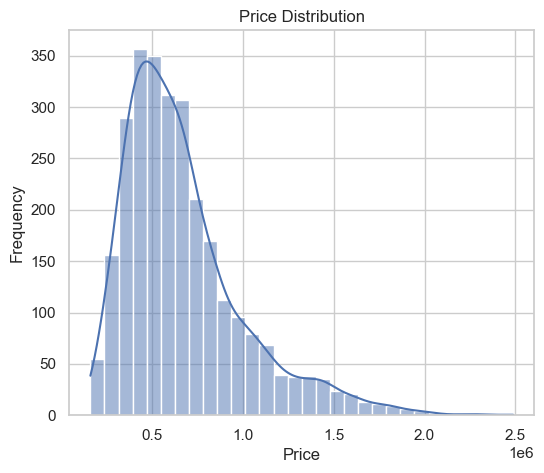

In [67]:
sns.set(style="whitegrid")

# Plot the distribution of prices
plt.figure(figsize=(6, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [68]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [69]:
from scipy.stats import zscore

df['engine_capacity_zscre'] = zscore(df['engine_capacity(CC)'])
df['km_driven_zscre'] = zscore(df['km_driven'])
df['overall_cost_zscre'] = zscore(df['overall_cost'])


df = df[(df.engine_capacity_zscre < 3) & (df.engine_capacity_zscre > -3)]
df = df[(df.km_driven_zscre < 3) & (df.km_driven_zscre > -3)]
df = df[(df.overall_cost_zscre < 3) & (df.overall_cost_zscre > -3)]


In [70]:
df=df.drop(columns=['engine_capacity_zscre','km_driven_zscre',	'overall_cost_zscre'])

In [71]:
df.shape

(2606, 11)

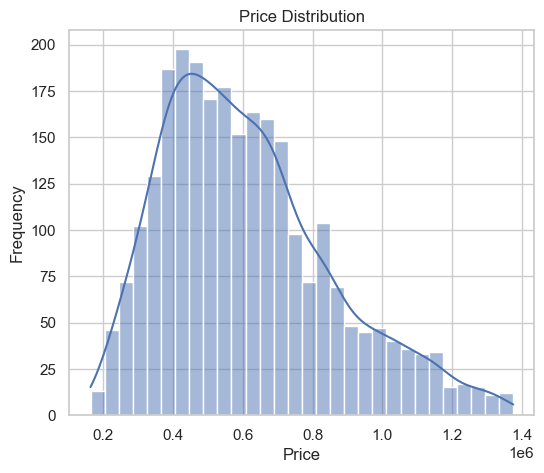

In [72]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2606 entries, 1 to 2804
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   brand                2606 non-null   object
 1   transmission         2606 non-null   object
 2   make_year            2606 non-null   int64 
 3   fuel_type            2606 non-null   object
 4   engine_capacity(CC)  2606 non-null   int64 
 5   km_driven            2606 non-null   int64 
 6   ownership            2606 non-null   object
 7   price                2606 non-null   int64 
 8   overall_cost         2606 non-null   int64 
 9   has_insurance        2606 non-null   object
 10  spare_key            2606 non-null   object
dtypes: int64(5), object(6)
memory usage: 244.3+ KB


In [74]:
print(len(df['has_insurance'].unique()))
df['has_insurance'].unique()

1


array([True], dtype=object)

In [75]:
df=df.drop(columns='has_insurance')

In [76]:
df = pd.get_dummies(df, columns=[ 'brand','transmission', 'fuel_type','ownership','spare_key'], drop_first=True)

In [77]:
df

,make_year,engine_capacity(CC),km_driven,price,overall_cost,brand_Ford,brand_Honda,brand_Hyundai,brand_Jeep,brand_KIA,...,brand_Tata,brand_Toyota,brand_Volkswagen,transmission_Manual,fuel_type_Diesel,fuel_type_Electric,fuel_type_Petrol,ownership_2nd owner,ownership_3rd owner,spare_key_Yes
1,2018,1591,66936,786000,15359,False,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
3,2023,1498,5061,1227000,23355,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,2021,1498,23480,887000,16883,True,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
5,2021,1199,44787,796000,15561,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
6,2022,1199,450,813000,15475,False,False,False,False,False,...,True,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,2013,1198,96363,213000,5614,False,True,False,False,False,...,False,False,False,True,False,False,True,True,False,True
2801,2018,1497,46982,661000,12920,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2802,2015,1199,38706,412000,8057,False,True,False,False,False,...,False,False,False,True,False,False,True,True,False,True
2803,2016,1197,31405,496000,9704,False,False,True,False,False,...,False,False,False,True,False,False,True,False,False,True


In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Cols = list(df.columns)
scaled_df = scaler.fit_transform(df[Cols])
scaled_df = pd.DataFrame(scaled_df, columns=Cols)

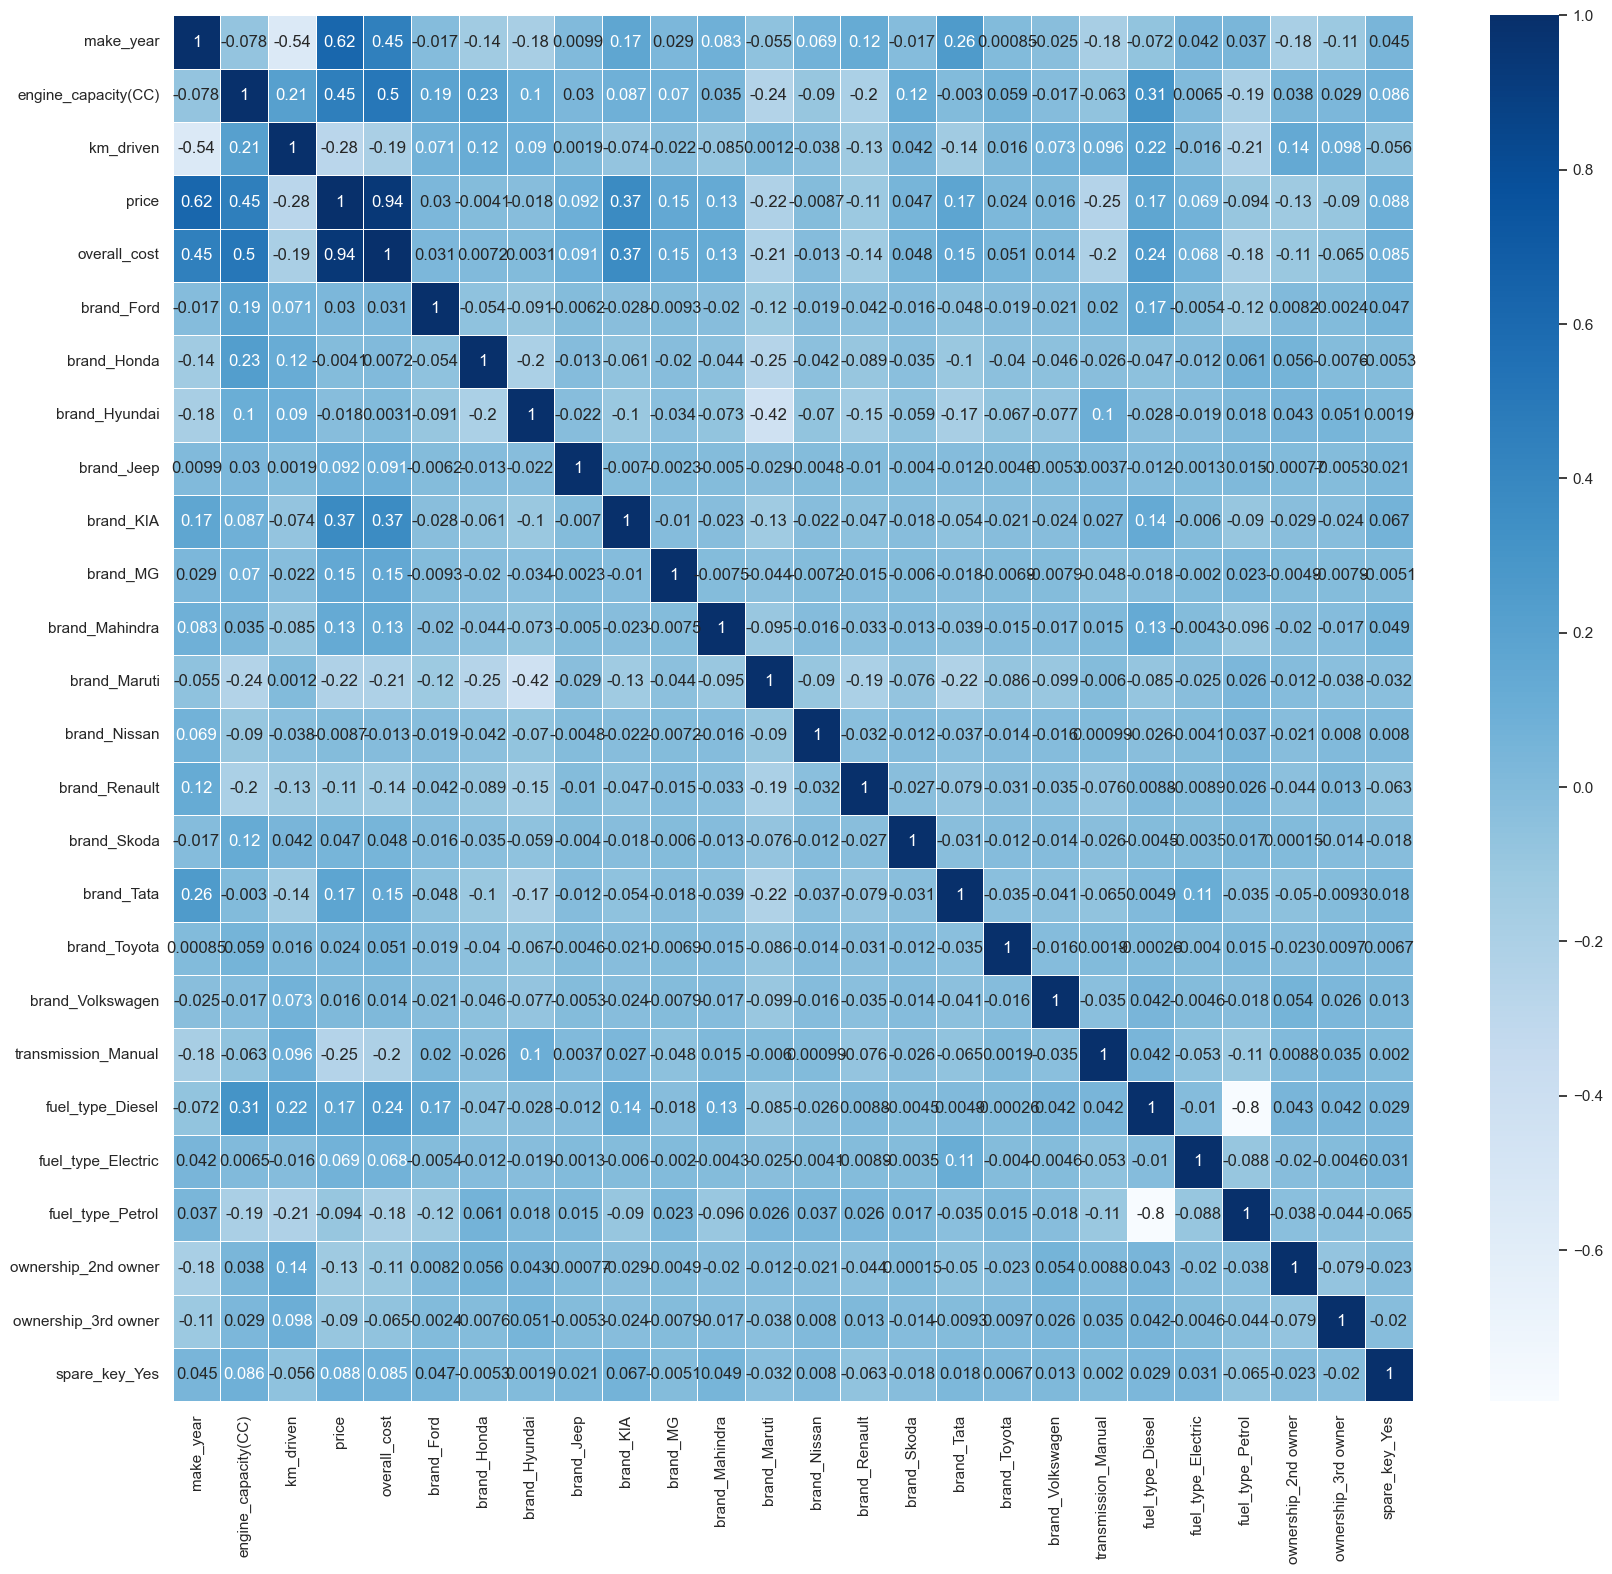

In [79]:
plt.figure(figsize=(20, 18))         
sns.heatmap(df.corr(), annot=True, cmap='Blues', linewidths=0.5)
plt.show()

In [80]:
y = scaled_df['price']
X = scaled_df.drop(['price'], axis=1)

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

LINEAR REGRESSION

In [82]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train) 

LinearRegression()

In [83]:
pred = lr.predict(X_test) 

In [84]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation

cv_scores = cross_val_score(lr, X_train, y_train, cv=5)  
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")

if cv_scores.std() > 0.05:
    print("Warning: Large variance in CV scores. Overfitting possible.")


Cross-Validation Scores: [0.95349684 0.94676378 0.93395487 0.93781279 0.94525677]
Mean CV Score: 0.9434570088319909


In [85]:
accuracy_test= lr.score(X_test,y_test)
print("Linear Regression accuracy test: {}%".format(int(round(accuracy_test * 100))))

Linear Regression accuracy test: 96%


In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
lr_mae=mean_absolute_error(y_test,pred)
print("The mean absolute error :",lr_mae)


lr_mse=mean_squared_error(y_test,pred)
print("The mean squared error :",lr_mse)

r_squared = r2_score(y_test, pred)
print(f'R^2: ',r_squared)

The mean absolute error : 0.1642980201210074
The mean squared error : 0.04696673107789615
R^2:  0.9553488704232704


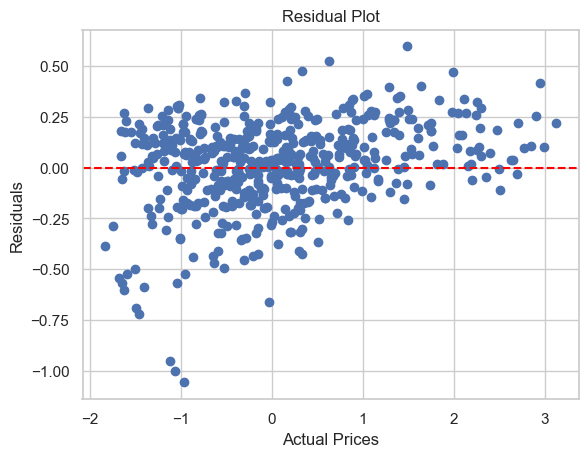

In [87]:
residuals = y_test - pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

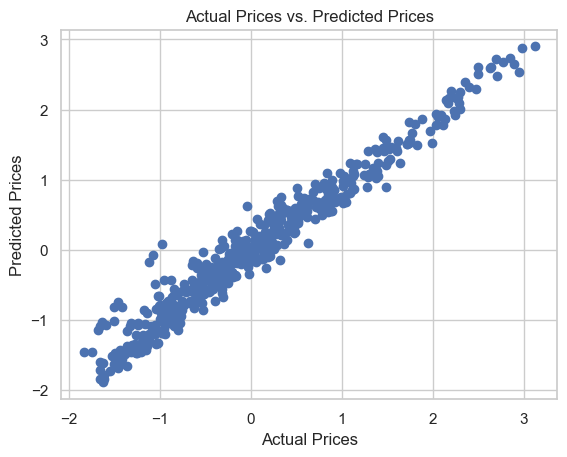

In [88]:
plt.scatter(y_test, pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

KNN

In [89]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors=3,weights="distance")
knn_regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [90]:
y_pred = knn_regressor.predict(X_test)


In [91]:

accuracy_test= knn_regressor.score(X_test,y_test)
print("KNN accuracy test: {}%".format(int(round(accuracy_test * 100))))

KNN accuracy test: 90%


In [92]:

knn_mae=mean_absolute_error(y_test,y_pred)
print("The mean absolute error :",knn_mae)


knn_mse=mean_squared_error(y_test,y_pred)
print("The mean squared error :",knn_mse)

r_squared = r2_score(y_test, y_pred)
print('R^2:', r_squared)

The mean absolute error : 0.22350110304784931
The mean squared error : 0.10126297077317666
R^2: 0.903729599110941


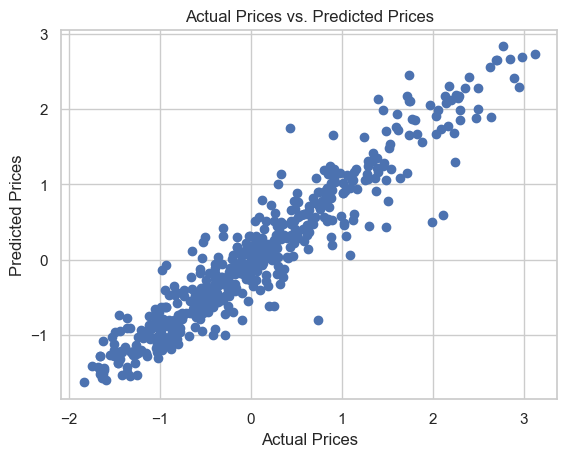

In [93]:

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

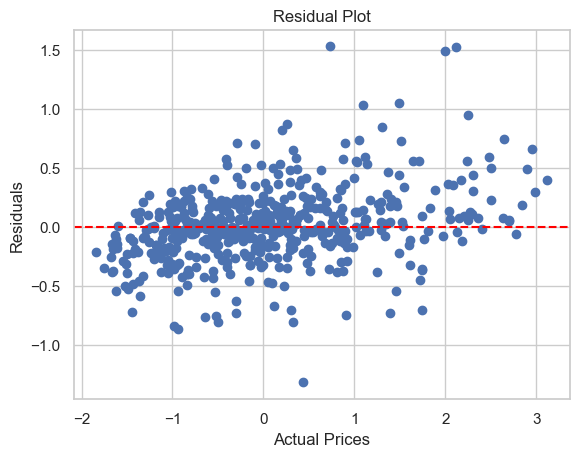

In [94]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()